# Customer Churn - Exploratory Data Analysis

This notebook explores the Telco Customer Churn dataset to understand:
- What features are available
- Data quality issues (missing values, data types)
- Distribution of the target variable (Churn)
- Relationships between features and churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
%matplotlib inline

## 1. Load the Data

In [2]:
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()

Dataset shape: 7043 rows, 21 columns


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Data Overview

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 3. Missing Values

In [5]:
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing': missing, 'Percent': missing_pct})
missing_df[missing_df['Missing'] > 0]

,Missing,Percent


In [6]:
# Check for hidden missing values (blank strings, whitespace)
for col in df.select_dtypes(include='object').columns:
    blank_count = (df[col].str.strip() == '').sum()
    if blank_count > 0:
        print(f"{col}: {blank_count} blank values")

TotalCharges: 11 blank values


C:\Users\numbe\AppData\Local\Temp\ipykernel_36052\2786721446.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in df.select_dtypes(include='object').columns:


## 4. Target Variable: Churn

In [7]:
churn_counts = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
print(f"  No:  {churn_counts['No']} ({churn_pct['No']:.1f}%)")
print(f"  Yes: {churn_counts['Yes']} ({churn_pct['Yes']:.1f}%)")

Churn Distribution:
  No:  5174 (73.5%)
  Yes: 1869 (26.5%)


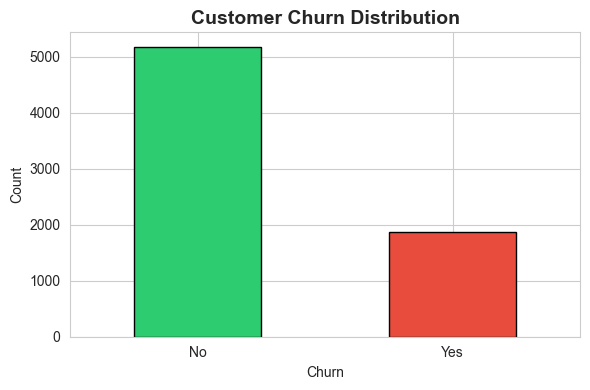

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))
colors = ['#2ecc71', '#e74c3c']
df['Churn'].value_counts().plot(kind='bar', color=colors, ax=ax, edgecolor='black')
ax.set_title('Customer Churn Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_xticklabels(['No', 'Yes'], rotation=0)
plt.tight_layout()
plt.show()

## 5. Feature Analysis

### 5.1 Categorical Features

In [9]:
categorical_cols = df.select_dtypes(include='object').columns.drop(['customerID', 'Churn'])
print(f"Categorical features: {len(categorical_cols)}")
print(list(categorical_cols))

Categorical features: 16
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


C:\Users\numbe\AppData\Local\Temp\ipykernel_36052\4025237048.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include='object').columns.drop(['customerID', 'Churn'])


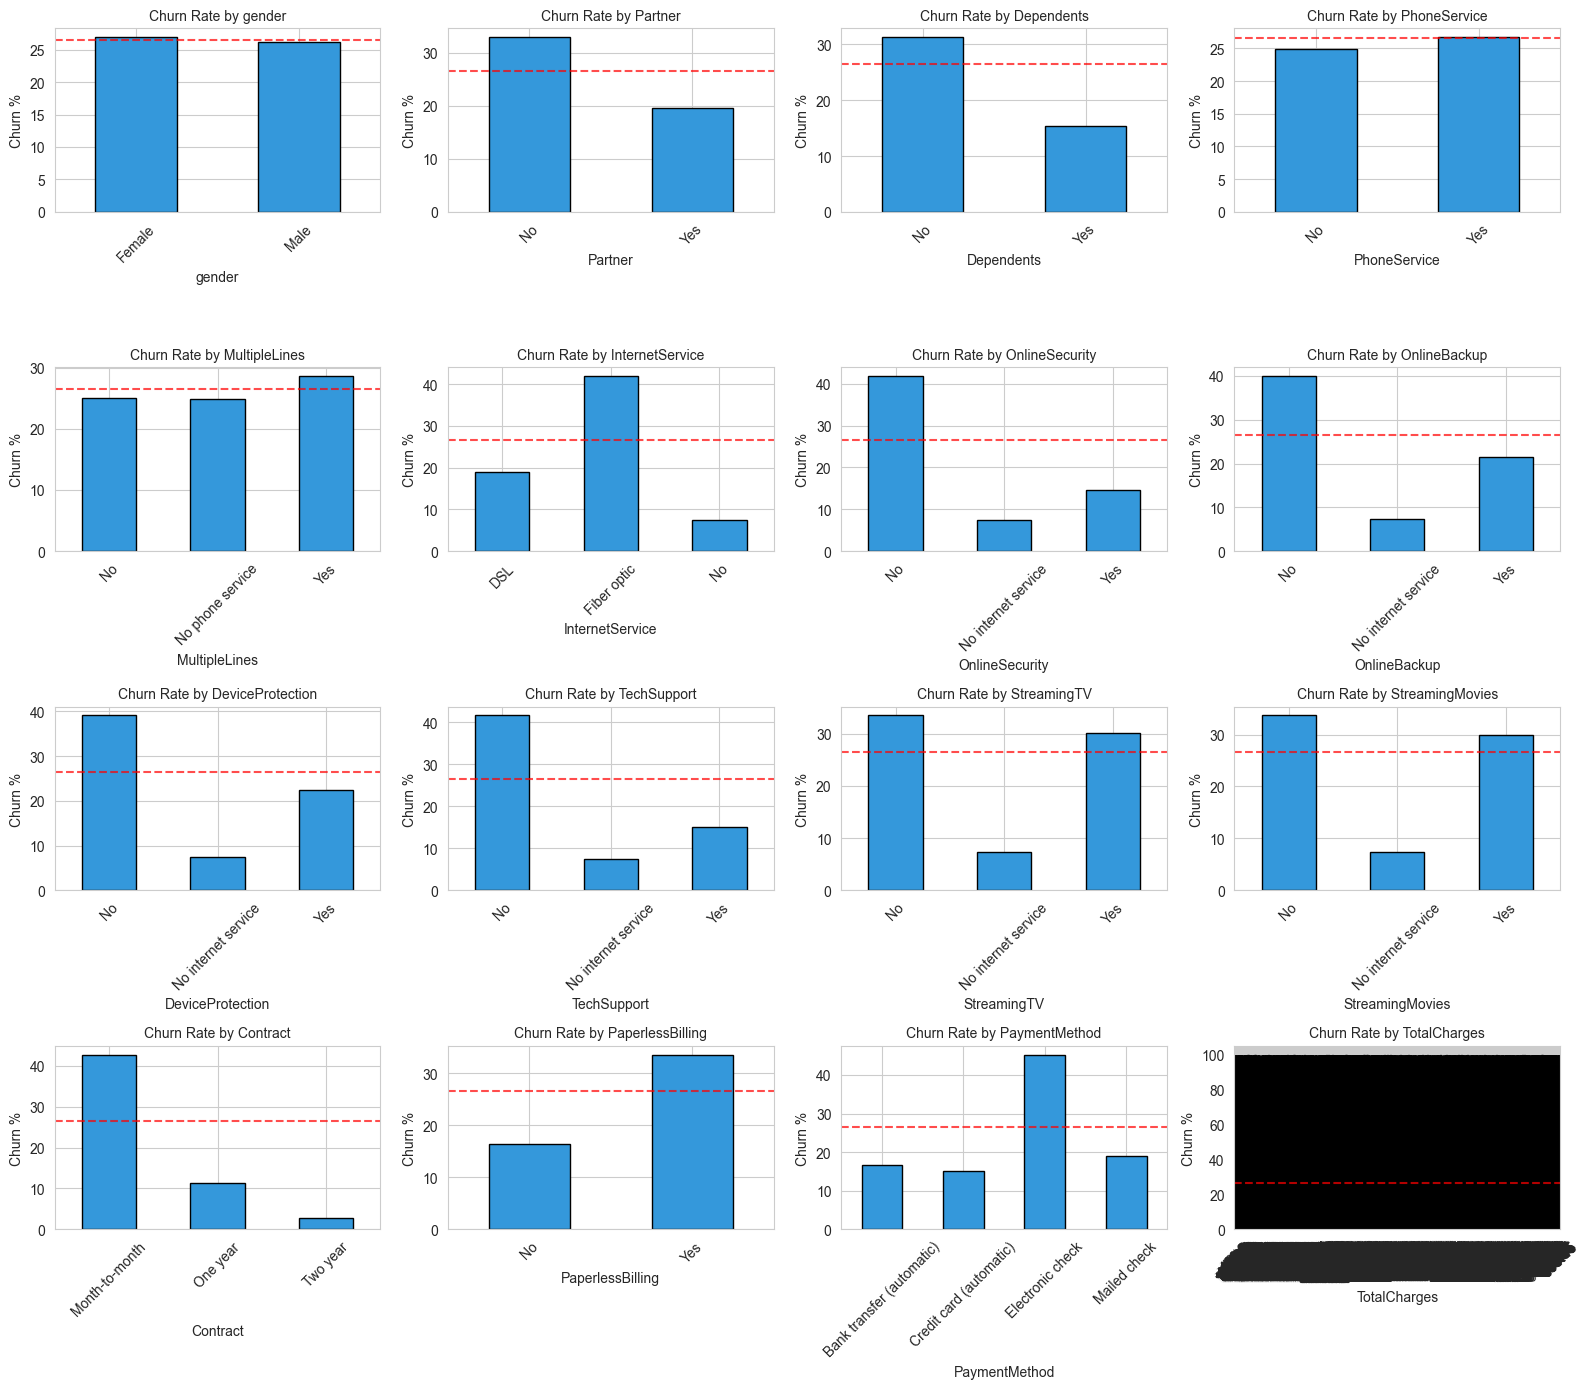

In [10]:
# Churn rate by categorical feature
fig, axes = plt.subplots(4, 4, figsize=(16, 14))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
    churn_rate.plot(kind='bar', ax=axes[i], color='#3498db', edgecolor='black')
    axes[i].set_title(f'Churn Rate by {col}', fontsize=10)
    axes[i].set_ylabel('Churn %')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].axhline(y=churn_pct['Yes'], color='red', linestyle='--', alpha=0.7)

# Hide empty subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### 5.2 Numerical Features

In [11]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# TotalCharges might be stored as string, convert it
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


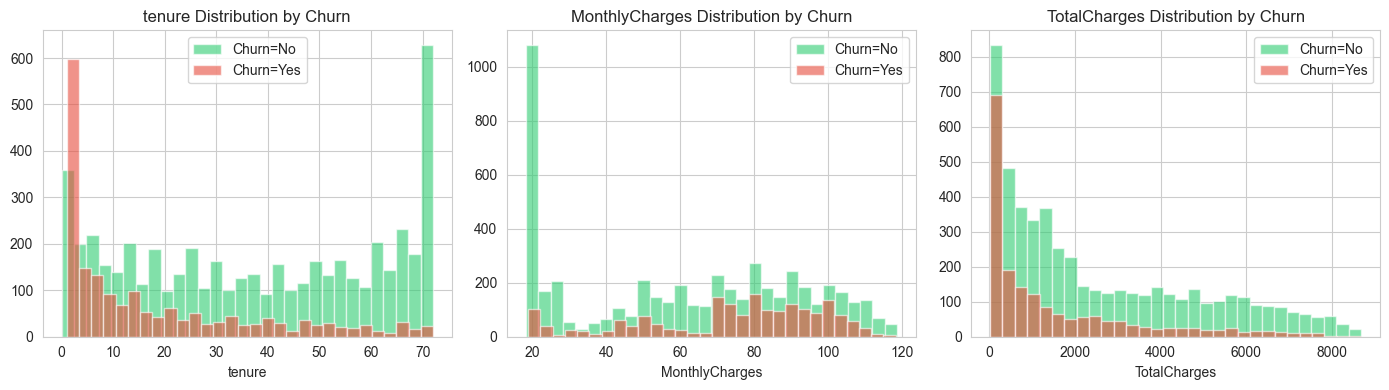

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for i, col in enumerate(numerical_cols):
    for churn_val, color in [('No', '#2ecc71'), ('Yes', '#e74c3c')]:
        subset = df[df['Churn'] == churn_val][col]
        axes[i].hist(subset, bins=30, alpha=0.6, label=f'Churn={churn_val}', color=color)
    axes[i].set_title(f'{col} Distribution by Churn')
    axes[i].set_xlabel(col)
    axes[i].legend()

plt.tight_layout()
plt.show()

C:\Users\numbe\AppData\Local\Temp\ipykernel_36052\617702533.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, ax=axes[i], palette=['#2ecc71', '#e74c3c'])
C:\Users\numbe\AppData\Local\Temp\ipykernel_36052\617702533.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, ax=axes[i], palette=['#2ecc71', '#e74c3c'])


C:\Users\numbe\AppData\Local\Temp\ipykernel_36052\617702533.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, ax=axes[i], palette=['#2ecc71', '#e74c3c'])


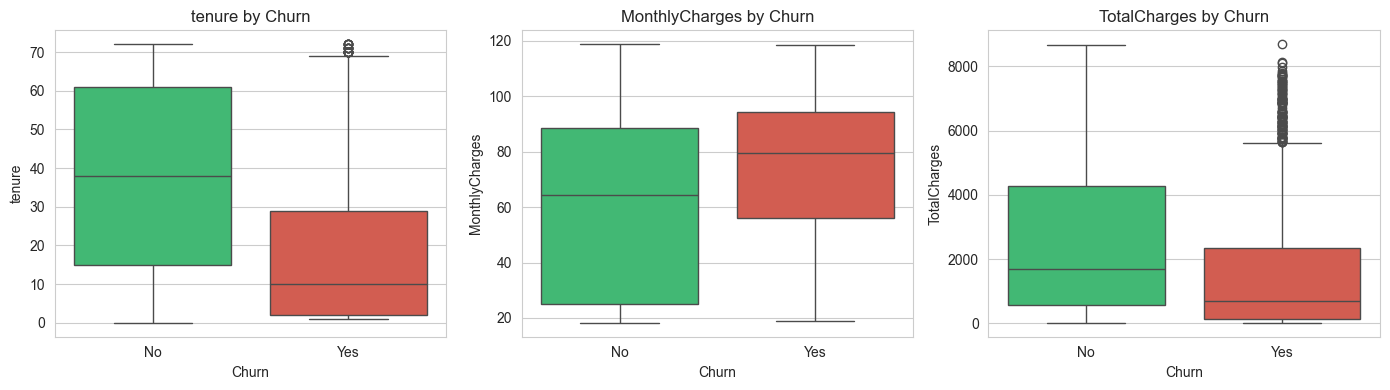

In [13]:
# Boxplots for numerical features by churn
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Churn', y=col, data=df, ax=axes[i], palette=['#2ecc71', '#e74c3c'])
    axes[i].set_title(f'{col} by Churn')

plt.tight_layout()
plt.show()

## 6. Correlation Analysis

In [14]:
# Create a binary churn column for correlation
df['Churn_Binary'] = (df['Churn'] == 'Yes').astype(int)

# Correlation of numerical features with churn
corr_with_churn = df[numerical_cols + ['Churn_Binary']].corr()['Churn_Binary'].drop('Churn_Binary')
print("Correlation with Churn:")
print(corr_with_churn.sort_values(ascending=False))

Correlation with Churn:
MonthlyCharges    0.193356
TotalCharges     -0.199484
tenure           -0.352229
Name: Churn_Binary, dtype: float64


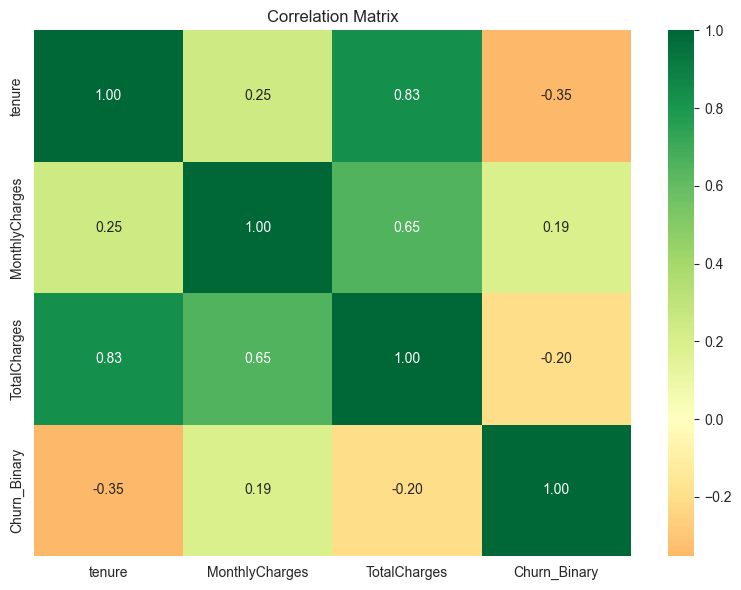

In [15]:
# Heatmap of numerical correlations
plt.figure(figsize=(8, 6))
corr_matrix = df[numerical_cols + ['Churn_Binary']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## 7. Key Observations

Summarize your findings here after running the notebook:

1. **Class Imbalance:** [Note the churn rate %]
2. **Missing Values:** [Note any data quality issues]
3. **High-Risk Segments:** [Which features show highest churn rates?]
4. **Numerical Patterns:** [What do tenure/charges tell us?]

---
*Next: Proceed to `02_preprocessing.ipynb` for data cleaning and feature engineering*